In [1]:
# Initiliaze necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# First read the data

diabetes_df = pd.read_csv('data/diabetes.csv')

In [3]:
# Display the data so we can see what we are working with

display(diabetes_df.columns, 
        diabetes_df.info(), 
        diabetes_df.head(),
        diabetes_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As we can see, the dataset we are working with consists of 8 different properties: pregnancies, glucose, blood pressure, skin thickness, insulin, BMI, diabtese pedigree function, and age. From these properities we are able to draw an conclusion of a binary outcome: 0 or 1, with 0 representing a negative result and 1 representing a positive result in the prediction of that patient having diabetes.

In [4]:
# Check for null values in the dataset

diabetes_df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [5]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here from the above code we first checked that is there any null values from the IsNull() function then we are going to take the sum of all those missing values from the sum() function and the inference we now get is that there are no missing values but that is actually not a true story as in this particular dataset all the missing values were given the 0 as a value which is not good for the authenticity of the dataset. Hence we will first replace the 0 value with the NAN value then start the imputation process.

In [6]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Data Visualization

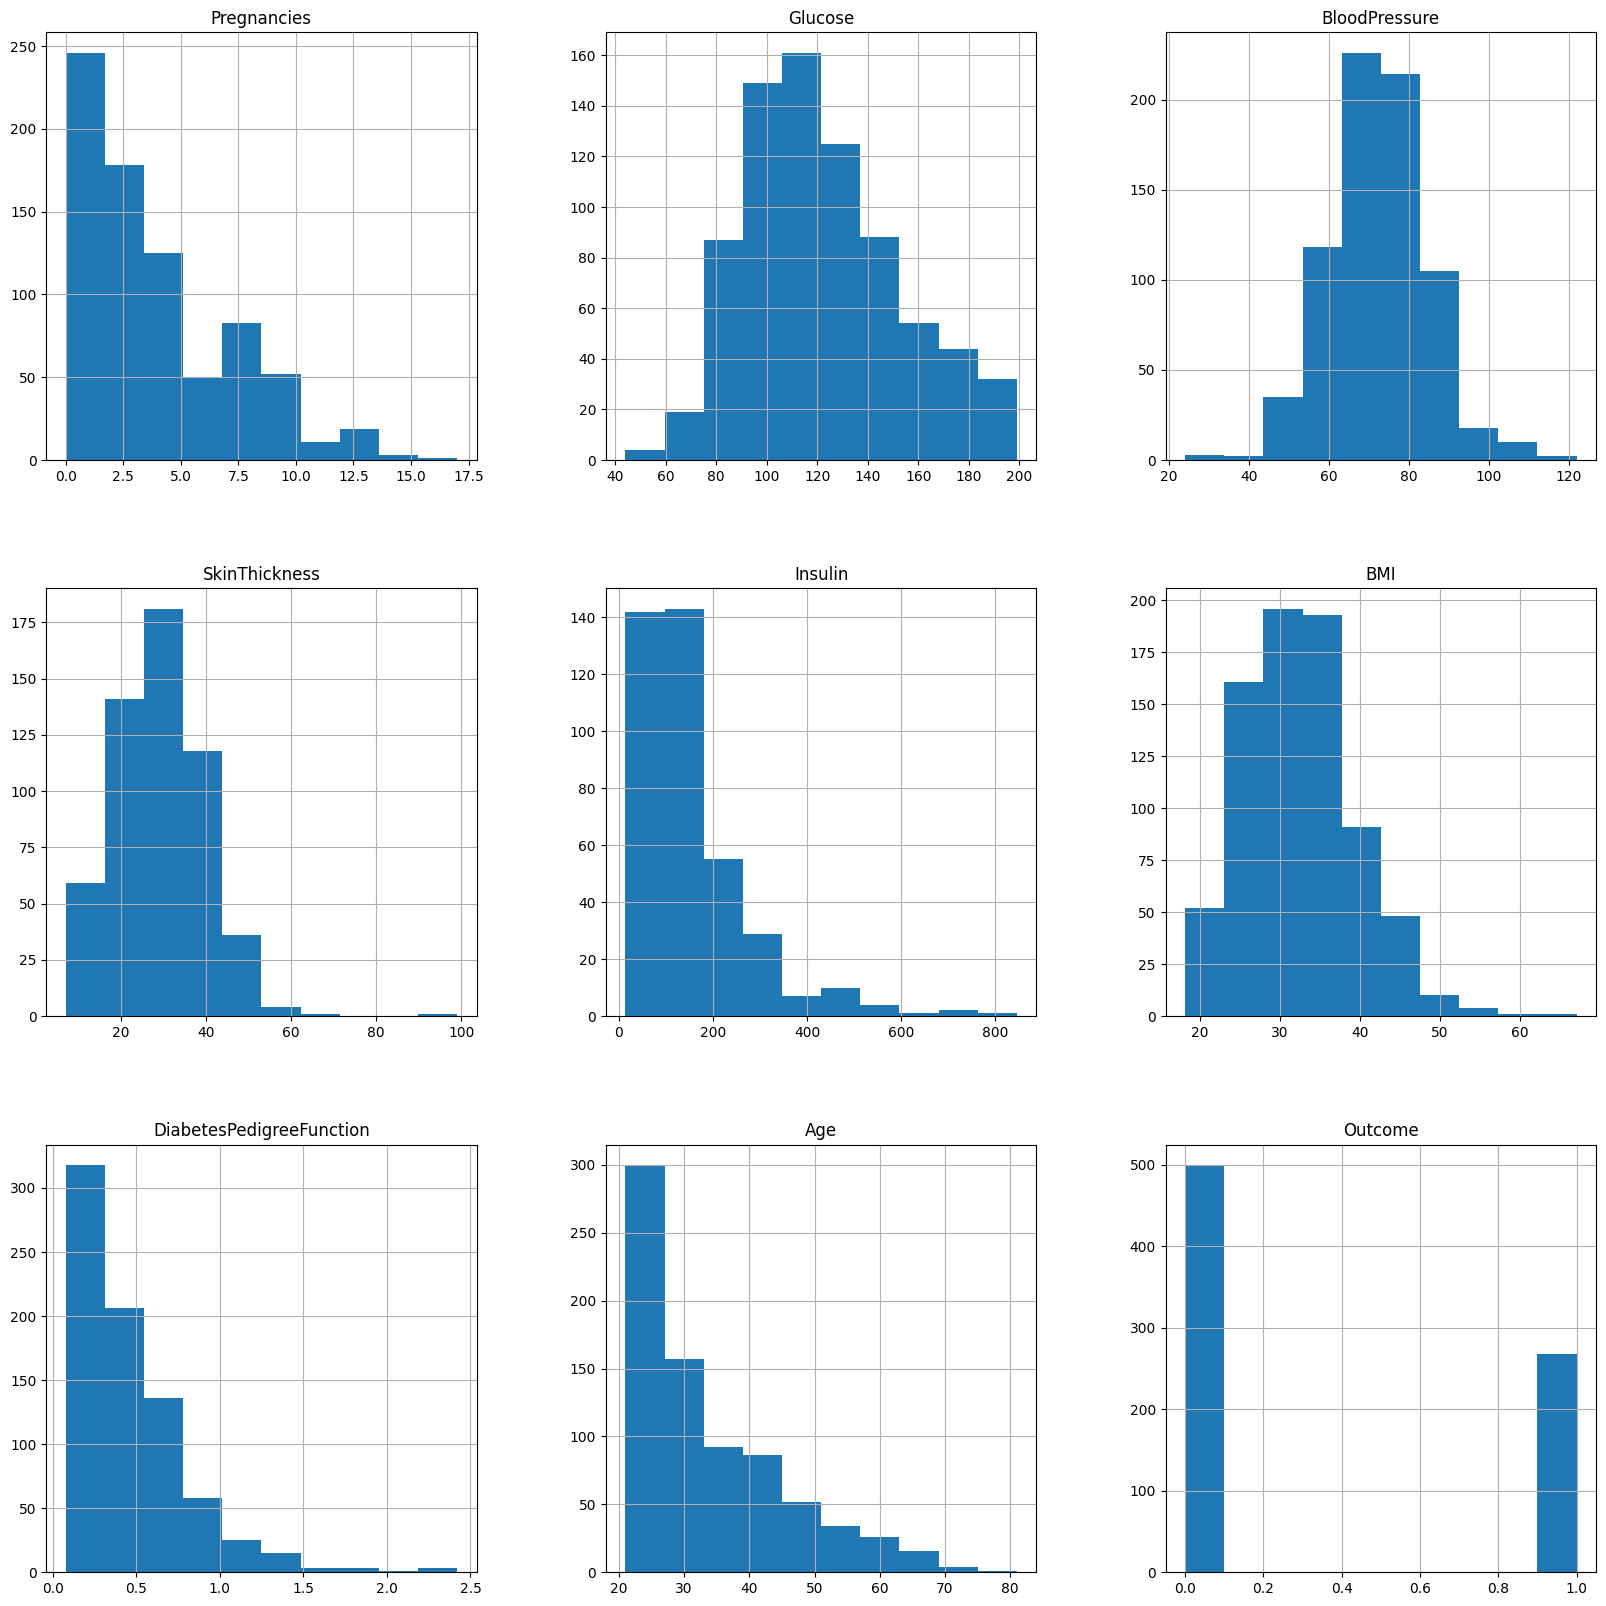

In [7]:
#Plot the data for better visualization

p = diabetes_df_copy.hist(figsize = (20,20))

So here we have seen the distribution of each features whether it is dependent data or independent data and one thing which could always strike that why do we need to see the distribution of data? So the answer is simple it is the best way to start the analysis of the dataset as it shows the occurrence of every kind of value in the graphical structure which in turn lets us know the range of the data.

In [8]:
# Remove the NANs and replace them with the mean(Glucose, Blood Pressure) and median (BMI, Insulin, Skin thickness) values

diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

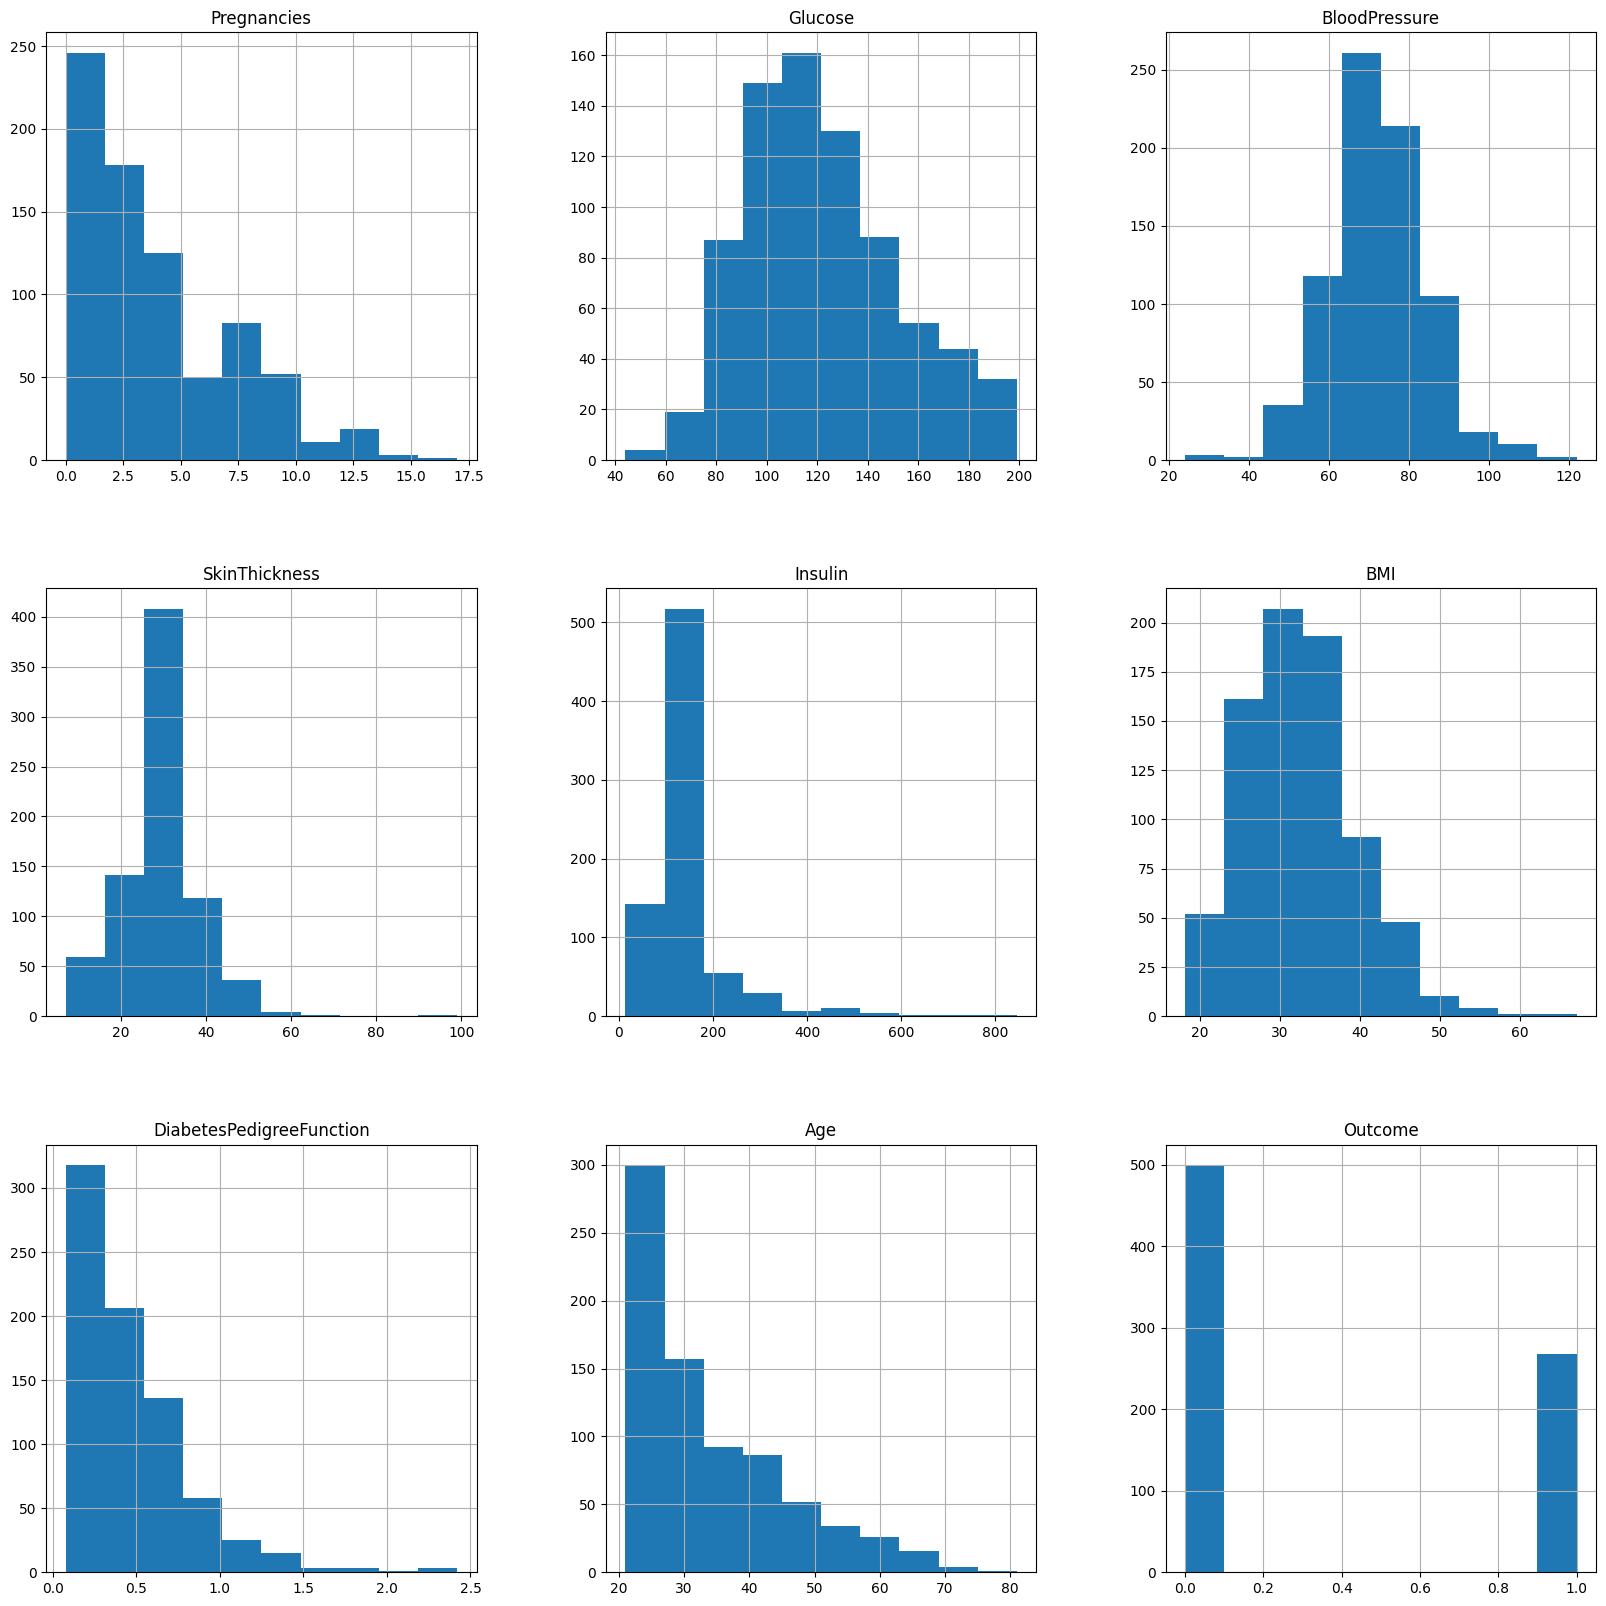

In [9]:
# Now plot the data again to see the difference
p = diabetes_df_copy.hist(figsize = (20,20))

Here we are again using the hist plot to see the distribution of the dataset but this time we are using this visualization to see the changes that we can see after those null values are removed from the dataset and we can clearly see the difference for example – In age column after removal of the null values, we can see that there is a spike at the range of 50 to 100 which is quite logical as well.

0    500
1    268
Name: Outcome, dtype: int64


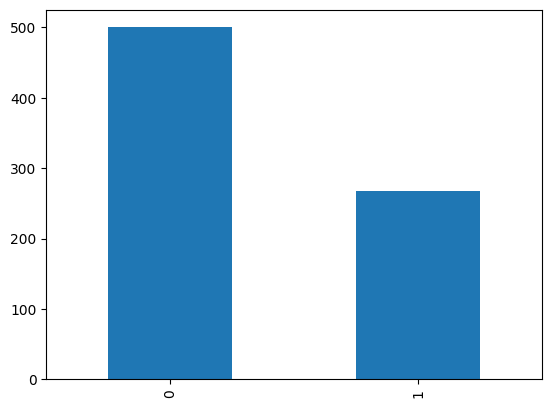

In [10]:
# Check the outcome balance

print(diabetes_df_copy['Outcome'].value_counts())
p = diabetes_df_copy.Outcome.value_counts().plot(kind="bar")

Here from the above visualization it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

/var/folders/sr/60t35rxs16b5bhc31mv2ctvr0000gn/T/ipykernel_61648/1587213579.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(diabetes_df['Insulin'])


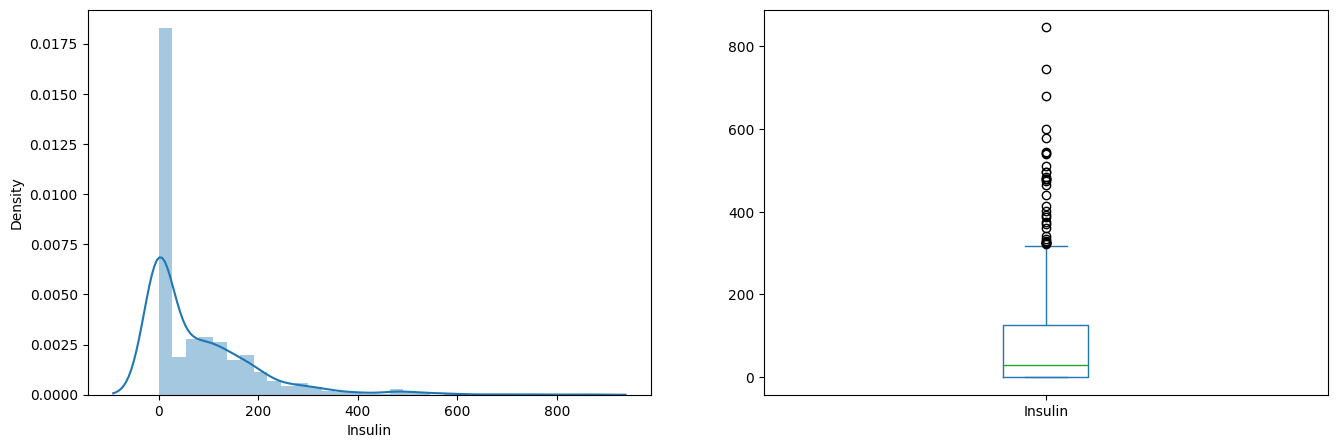

In [11]:
plt.subplot(121), sns.distplot(diabetes_df['Insulin'])
plt.subplot(122), diabetes_df['Insulin'].plot.box(figsize=(16,5))
plt.show()

That’s how Distplot can be helpful where one will able to see the distribution of the data as well as with the help of boxplot one can see the outliers in that column and other information too which can be derived by the box and whiskers plot.

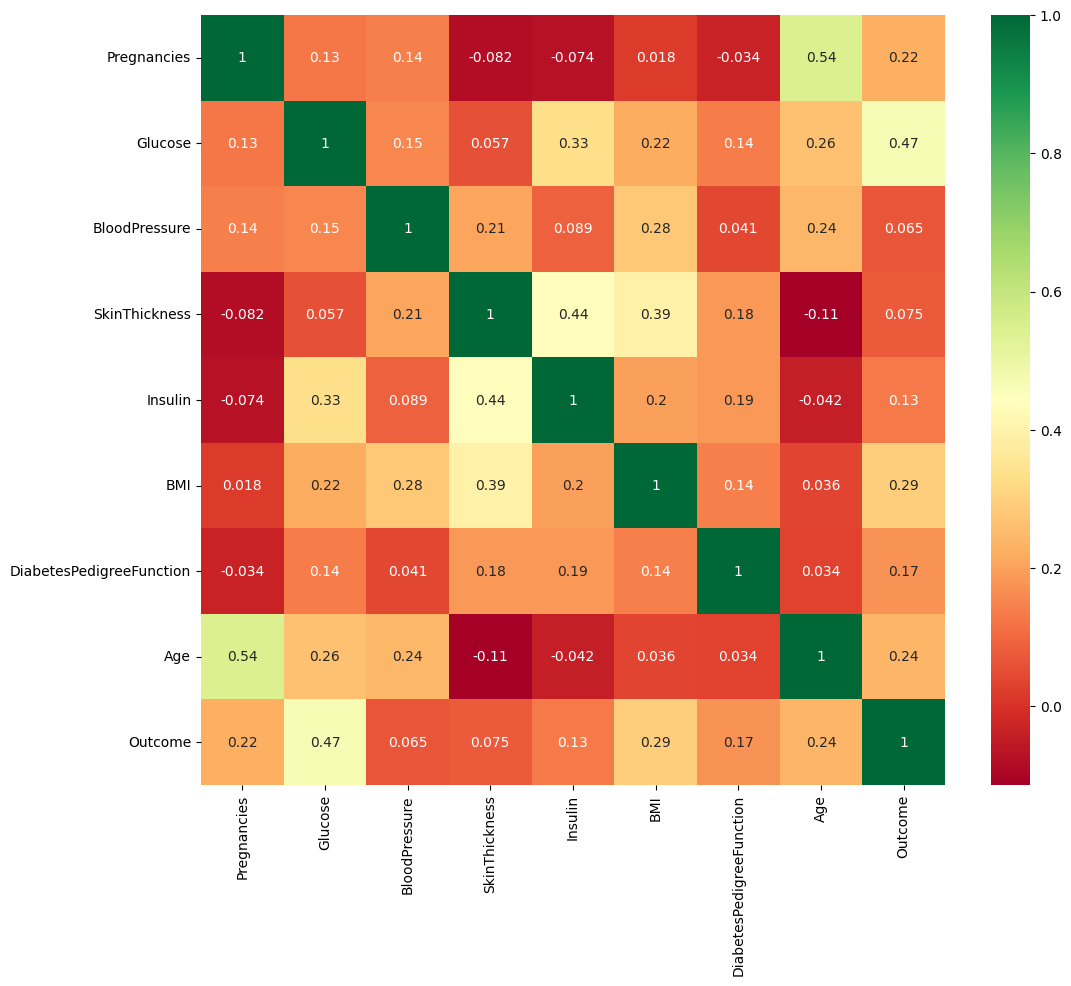

In [12]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

# SCALING THE DATA 
Now we proceed to scale the data down

In [13]:
# Compare and see the data before and after cleaning, before we scale it down

print(diabetes_df_copy.head())
print(diabetes_df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1 

In [14]:
# By using the StandardScaler, we can scale down the data to a more manageable size
sc_X = StandardScaler()

# Fit and transform the data
X = pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

# Display the scaled data
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


This is what our dataset should ideally look like when it has been scaled down. We are now able to see all the values on the same scale which will ultimately help our ML model in giving a better result.

In [15]:
# Display the target data

diabetes_df_target = diabetes_df_copy.loc[:,['Outcome']]
diabetes_df_target


,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


# MODEL BUILDING 
I am now going to build 4 different models around the dataset and then compare the accuracy of each model to see which one is the best.\
\
The models I am going to build are: 
* Random Forest Classifier
* Decision Tree Classifier
* XgBoost Classifier
* Support Vector Machine Classifier

First we start with splitting the dataset

In [16]:
# Split the dataset 

x = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [17]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=7)

# RANDOM FOREST CLASSIFIER

In [18]:
# Create the model and fit the data

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [19]:
# Train the model and check the score

rfc_train = rfc.predict(X_train) 
print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


Acurray score of 1.0 here indicates to us that the model is overfitting. 

In [20]:
predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7598425196850394


In [21]:
# Display the confusion matrix

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, predictions))

Confusion Matrix:
[[134  28]
 [ 33  59]]


In [22]:
# Display the random forest classifier

print("Random Forest Classifier:")
print(metrics.classification_report(y_test, predictions))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       162
           1       0.68      0.64      0.66        92

    accuracy                           0.76       254
   macro avg       0.74      0.73      0.74       254
weighted avg       0.76      0.76      0.76       254



# DECISION TREE CLASSIFIER

In [23]:
# Create the decision tree classifier model and fit the data

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
# Now train the model and check the score

dtree_pred = dtree.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, dtree_pred)))

Accuracy_Score = 0.7244094488188977


An acuuraccy score of 0.72 indicates to us that the model is not overfitting and is giving us a good result.

In [25]:
# Display the confusion matrix

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, predictions))

Confusion Matrix:
[[134  28]
 [ 33  59]]


In [26]:
# Display the decision tree classifier

print("Decision Tree Classifier:")
print(metrics.classification_report(y_test, predictions))

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       162
           1       0.68      0.64      0.66        92

    accuracy                           0.76       254
   macro avg       0.74      0.73      0.74       254
weighted avg       0.76      0.76      0.76       254



# XGBOOST CLASSIFIER

In [27]:
# We need to install xgboost to using pip since it is not installed by default

import sys

!{sys.executable} -m pip install xgboost

from xgboost import XGBClassifier


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [28]:
# Create the XGBoost classifier model and fit the data

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [29]:
# Now train the model and check the score

xgb_pred = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.7165354330708661


An accuracy score of 0.72 is not bad, but we can do better.

In [30]:
# Display the confusion matrix

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, predictions))

Confusion Matrix:
[[134  28]
 [ 33  59]]


In [31]:
# Display the XGBoost classifier

print("XGBoost Classifier:")
print(metrics.classification_report(y_test, predictions))

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       162
           1       0.68      0.64      0.66        92

    accuracy                           0.76       254
   macro avg       0.74      0.73      0.74       254
weighted avg       0.76      0.76      0.76       254



# Support Vector Machine Classifier

In [32]:
# Build the SVM model and fit the data

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [33]:
# Now train the model and check the score

svc_pred = svc_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))


Accuracy Score = 0.7716535433070866


In [34]:
# Display the confusion matrix

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, svc_pred))


Confusion Matrix:
[[138  24]
 [ 34  58]]


In [35]:
# Display the SVM classifier

print("SVM Classifier:")
print(metrics.classification_report(y_test, svc_pred))

SVM Classifier:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       162
           1       0.71      0.63      0.67        92

    accuracy                           0.77       254
   macro avg       0.75      0.74      0.75       254
weighted avg       0.77      0.77      0.77       254



FIX THE CODE ABOVE ^ (SVM Classifier) \

# CONCLUSION